In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
#null hypothesis 
#there is no significant difference in the cognitive ability between genders 

In [3]:
#calculate pvalue for t-test (math ability) 
#read data from csv file 
filename = "spatial_recognition_responses.csv"
sr_df = pd.read_csv(filename)

#drop the items that are not needed for the calculation 
sr_df = sr_df.drop( [ 'Timestamp', 'name',  'age', 'total_time'], axis='columns' )

#male and female score pulled out from data
male_scores = sr_df[sr_df['gender'] == 'male']['score']
female_scores = sr_df[sr_df['gender'] == 'female']['score']

#find mean 
m_mean = male_scores.mean()
f_mean = female_scores.mean()

#find difference in mean
diff_mean = m_mean - f_mean
print(diff_mean)
#mean score of male is 0.968 points greater than female 
#0.968 difference in score 

#calculate significant difference using t-test
result_sr = stats.ttest_ind(male_scores, female_scores)
result_sr.pvalue

0.9682539682539684


0.20862977069108615

In [4]:
###intepreting the t-test p-value -> math ability <- ### 
#p-value = 0.2086

# If p-value ≤ alpha:
# Reject the null hypothesis.
# Conclude that there is evidence to suggest a significant effect or difference.

# If p-value > alpha:
# Fail to reject the null hypothesis.
# Conclude that there is not enough evidence to suggest a significant effect or difference.

#alpha chosen = 0.05 (0.5%) 
#since p-value > 0.05
#null hypothesis can be accepted
#meaning that there is not enough evidence to suggest a significant effect or difference in the math ability of male and female.

In [5]:
#displaying results 
#sr_df.head()

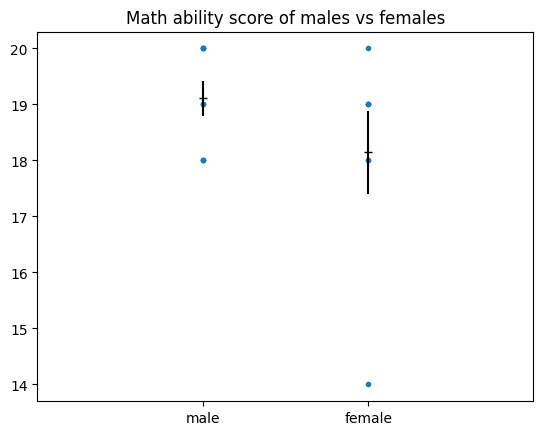

In [7]:
#plot dot graph 

fig = plt.figure()
ax = fig.add_subplot()

ax.plot(sr_df['gender'],sr_df['score'],'.')
#x-axis limits for 2 categories 
#range from 0 to 1 
#adjust for nicer spacing 
ax.set_xlim(-1,2) 

#score categorised by gender
m_df = male_scores 
f_df = female_scores

#mean 
m_mean = m_df.mean()
f_mean = f_df.mean()

#standard_error of both gender 
m_std_error = stats.sem(m_df)
f_std_error = stats.sem(f_df)

#draw the mean with error bars 
ax.errorbar('male', m_mean, yerr=m_std_error, marker='_', color='black')
ax.errorbar('female', f_mean, yerr=f_std_error, marker='_', color='black')

ax.set_title("Math ability score of males vs females")

plt.show()